# Effect of the truncation error of the Runge-Kutta fourth order method on the Lorenz system

# Combined Bachelor Thesis (NS-320B), June 2022
## Mathematics & Physics and Astronomy
*'Applying Physics-informed Neural Networks to Chaotic Systems of Ordinary Differential Equations'*

**Author:** Martijn Sebastiaan Brouwer (6859488)

**Mathematics supervisors:** prof. dr. ir. C.W. Oosterlee

**Physics supervisor:** dr. J. de Graaf

**PhD supervisor:** B. Negyesi

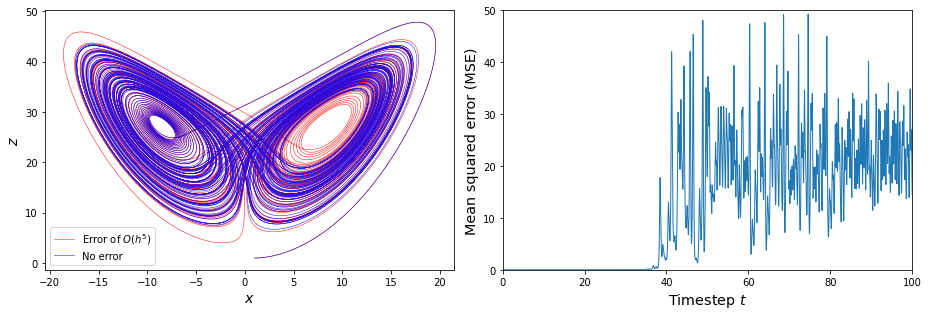

In [12]:
# ----------------------------------------------------------------------------- 
# -------------------------- Importing packages ------------------------------- 
# ----------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt


# ----------------------------------------------------------------------------- 
# ------------------------------- Definitions --------------------------------- 
# ----------------------------------------------------------------------------- 
# Lorenz system ---------------------------------------------------------------
def dxdt(x,y,z): return -sigma*x + sigma*y
def dydt(x,y,z): return -x*z + rho*x - y
def dzdt(x,y,z): return x*y - beta*z

# Runge-Kutta fourth order method ---------------------------------------------
def RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf,error):
    n = (int)((tf - ti)/h)
    xl = n*[0]
    yl = n*[0]
    zl = n*[0]
    xl[0],yl[0],zl[0] = x0,y0,z0
    for i in range(1,n):
        x,y,z = xl[i-1],yl[i-1],zl[i-1]

        k1x,k1y,k1z = (h*f(x,y,z)    for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k1x,k1y,k1z,h)))
        k2x,k2y,k2z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + 0.5*kr    for r,kr in zip((x,y,z),(k2x,k2y,k2z,h)))
        k3x,k3y,k3z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        xs,ys,zs    = (r + kr        for r,kr in zip((x,y,z),(k3x,k3y,k3z,h)))
        k4x,k4y,k4z = (h*f(xs,ys,zs) for f in (dxdt,dydt,dzdt))
        
        xl[i],yl[i],zl[i] = (r + (k1r + 2*k2r + 2*k3r + k4r)/6 + error for r,k1r,k2r,k3r,k4r in 
                zip((x,y,z),(k1x,k1y,k1z),(k2x,k2y,k2z),(k3x,k3y,k3z),(k4x,k4y,k4z)))
    return xl,yl,zl


# ----------------------------------------------------------------------------- 
# --------------------- Parameters and generating data ------------------------
# ----------------------------------------------------------------------------- 
sigma,rho,beta = 10,28,8/3
x0,y0,z0 = 1,1,1
ti = 0
tf = 100
h = 0.001
tau = h**5 # Truncation error
xu,yu,zu = RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf,tau)
xl,yl,zl = RungeKutta(dxdt,dydt,dzdt, x0,y0,z0, h,ti,tf,0)
t = np.linspace(ti,tf,(int)((tf - ti)/h))

MSE = [] # Calculation of MSE between the variants with and without truncation error
for i in range(len(xu)):
    diff = np.sqrt((xu[i]-xl[i])**2 + (yu[i]-yl[i])**2 + (zu[i]-zl[i])**2)
    MSE.append(diff)


# ----------------------------------------------------------------------------- 
# ------------------------------- Plotting ------------------------------------
# ----------------------------------------------------------------------------- 
fig = plt.figure(figsize=(13,4.5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(xu, zu, color="red", linewidth=0.6, alpha=0.8, label="Error of $O(h^5)$")
ax.plot(xl, zl, color="blue", linewidth=0.6, alpha=0.8, label="No error")
ax.legend()
ax.set_xlabel('$x$', fontsize="x-large")
ax.set_ylabel('$z$', fontsize="x-large")

ax = fig.add_subplot(1, 2, 2)
ax.plot(t, MSE, linewidth=1)
ax.set_xlabel("Timestep $t$".format(tf,h), fontsize="x-large")
ax.set_ylabel("Mean squared error (MSE)", fontsize="x-large")
ax.set_xlim(0,100)
ax.set_ylim(0,50)
plt.tight_layout()
plt.savefig('MSE_RK4.png')
plt.show()